# Some other features in Bayesian inference

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Lazy Propagation uses a secondary structure called the "Junction Tree" to perform the inference.

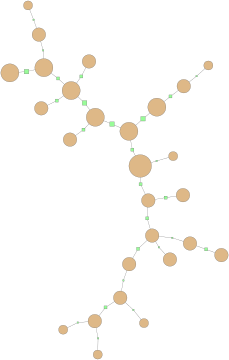

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN("res/alarm.dsl")
gnb.showJunctionTreeMap(bn);

But this junction tree can be transformed to build different probabilistic queries.

In [2]:
bn=gum.fastBN("A->B->C->D;A->E->D;F->B;C->H")
ie=gum.LazyPropagation(bn)
bn              

(pyAgrum.BayesNet<double>@0x10801fc00) BN{nodes: 7, arcs: 7, domainSize: 128, dim: 16, mem: 256o}

## Evidence impact 
Evidence Impact allows the user to analyze the effect of any variables on any other variables

In [3]:
ie.evidenceImpact("B",["A","H"])

(pyAgrum.Potential<double>@0x600001849260) 
             ||  B                |
H     |A     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.1241  | 0.8759  |
1     |0     || 0.1326  | 0.8674  |
0     |1     || 0.5310  | 0.4690  |
1     |1     || 0.5499  | 0.4501  |

Evidence impact is able to find the minimum set of variables which effectively conditions the analyzed variable

In [4]:
ie.evidenceImpact("E",["A","F","B","D"]) # {A,D,B} d-separates E and F

(pyAgrum.Potential<double>@0x600001849d40) 
                    ||  E                |
D     |B     |A     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.2855  | 0.7145  |
1     |0     |0     || 0.2627  | 0.7373  |
0     |1     |0     || 0.2831  | 0.7169  |
1     |1     |0     || 0.2661  | 0.7339  |
0     |0     |1     || 0.7251  | 0.2749  |
1     |0     |1     || 0.7017  | 0.2983  |
0     |1     |1     || 0.7228  | 0.2772  |
1     |1     |1     || 0.7054  | 0.2946  |

In [5]:
ie.evidenceImpact("E",["A","B","C","D","F"]) # {A,C,D} d-separates E and {B,F}

(pyAgrum.Potential<double>@0x600001869120) 
                    ||  E                |
D     |A     |C     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.2758  | 0.7242  |
1     |0     |0     || 0.2766  | 0.7234  |
0     |1     |0     || 0.7155  | 0.2845  |
1     |1     |0     || 0.7163  | 0.2837  |
0     |0     |1     || 0.2959  | 0.7041  |
1     |0     |1     || 0.2464  | 0.7536  |
0     |1     |1     || 0.7352  | 0.2648  |
1     |1     |1     || 0.6835  | 0.3165  |

## Evidence Joint Impact

In [6]:
ie.evidenceJointImpact(["A","F"],["B","C","D","E","H"]) # {B,E} d-separates [A,F] and [C,D,H]

(pyAgrum.Potential<double>@0x6000018605e0) 
                    ||  A                |
F     |B     |E     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.0068  | 0.0127  |
1     |0     |0     || 0.0147  | 0.9658  |
0     |1     |0     || 0.0096  | 0.1643  |
1     |1     |0     || 0.1395  | 0.6866  |
0     |0     |1     || 0.0399  | 0.0113  |
1     |0     |1     || 0.0866  | 0.8622  |
0     |1     |1     || 0.0344  | 0.0895  |
1     |1     |1     || 0.5020  | 0.3740  |